# Типы данных и конструирование признаков

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame(pd.read_csv('train.csv')) # данные о титанике
df = df.drop(['Ticket','Cabin','Name','PassengerId'],axis=1) # отбросим некоторые данные для  удобства
df = df.dropna() # для простоты отбросим NaN данные
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


## Категорильаные признаки и их обработка

*Категориальные признаки - это переменные, которые описывают качественные характеристики объектов и могут принимать ограниченное количество различных значений, обычно представляющих собой категории или метки. Эти признаки могут быть номинальными или порядковыми.*

Категориальные признаки часто требуется преобразовывать для использования в машинном обучении, так как многие алгоритмы работают с числовыми значениями. Это необходимо для алгоритмов, требующих числовых входов, и для избежания неупорядоченности в случае неупорядоченных категорий. Преобразование может также повысить производительность модели и обеспечить совместимость с алгоритмами, не поддерживающими категориальные значения. 

### Прямое кодирование - кодирование с одним горячим состоянием (one-hot-encoding)

In [3]:
target = df.Survived  # отдельно зависимую переменную
print(target)
df_data = df.drop('Survived',axis=1)
df_data

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 712, dtype: int64


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
885,3,female,39.0,0,5,29.1250,Q
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
889,1,male,26.0,0,0,30.0000,C


- прежде чем кодировать важно посмотреть целостность и осмысленность данных 

In [4]:
df_data[['Embarked']]  # закодируем в дамми-переменные

,Embarked
0,S
1,C
2,S
3,S
4,S
...,...
885,Q
886,S
887,S
889,C


In [6]:
df_data.Embarked.value_counts() # данные трёх значений категориального типа 

S    554
C    130
Q     28
Name: Embarked, dtype: int64

*В реальном примере вы должны просмотреть все столбцы и проверить их значения*

In [7]:
pd.get_dummies(df_data) # преобразование категориальных данных всего датафрейма

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
885,3,39.0,0,5,29.1250,1,0,0,1,0
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


Прямое кодирование, которое мы используем, довольно схоже с 
дамми-кодированием, применяемым в статистике, но не 
идентично ему. В целях упрощения мы кодируем категории 
переменной с помощью бинарных признаков. В статистике 
категориальную переменную, принимающую k различных 
возможных значений (категорий), обшепринято кодировать с 
помощью k-1 признаков, при этом для последней категории все 
признаки будут иметь нулевые значения. Это делается для
упрощения анализа (говоря более техническим языком, это
позволяет избежать получения матрицы неполного ранга).

In [8]:
data = pd.get_dummies(df_data, drop_first=True)  # k-1 признак
data

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
885,3,39.0,0,5,29.1250,0,1,0
886,2,27.0,0,0,13.0000,1,0,1
887,1,19.0,0,0,30.0000,0,0,1
889,1,26.0,0,0,30.0000,1,0,0


In [9]:
data.values  # преобразование в массив NumPy для обучения модели

array([[ 3., 22.,  1., ...,  1.,  0.,  1.],
       [ 1., 38.,  1., ...,  0.,  0.,  0.],
       [ 3., 26.,  0., ...,  0.,  0.,  1.],
       ...,
       [ 1., 19.,  0., ...,  0.,  0.,  1.],
       [ 1., 26.,  0., ...,  1.,  0.,  0.],
       [ 3., 32.,  0., ...,  1.,  1.,  0.]])

*Преобразование данных в массив NumPy не является обязательным для всех библиотек машинного обучения, но многие из них, такие как scikit-learn, часто принимают на вход NumPy-массивы или подобные структуры данных.*

**Во многих случаях, вы можете использовать прямо DataFrame, не преобразуя его в массив NumPy**

In [10]:
# теперь модель логистической регрессии будет работать 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,target)

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000,random_state=3).fit(X_train, y_train)

print(f'Правильность на тестовом наборе: {log_reg.score(X_test, y_test):.3}')

Правильность на тестовом наборе: 0.798


Функция get_dummies закодирует лишь строковый признак, тогда как
целочисленный признак оставит без изменений.
Если вы хотите создать дамми-переменные для столбца с 
целочисленным признаком, вы можете явно указать столбцы, которые 
нужно закодировать, с помощью параметра columns.

In [11]:
pd.get_dummies(df_data, columns=['Pclass','Embarked','Sex'], drop_first=True)

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,22.0,1,0,7.2500,0,1,0,1,1
1,38.0,1,0,71.2833,0,0,0,0,0
2,26.0,0,0,7.9250,0,1,0,1,0
3,35.0,1,0,53.1000,0,0,0,1,0
4,35.0,0,0,8.0500,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...
885,39.0,0,5,29.1250,0,1,1,0,0
886,27.0,0,0,13.0000,1,0,0,1,1
887,19.0,0,0,30.0000,0,0,0,1,0
889,26.0,0,0,30.0000,0,0,0,0,1


## Биннинг, дискретизация, линейные модели и деревья

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [13]:
def generate_linear_data(n_samples=100, slope=2, intercept=1, noise_std=2.5):
    """
    Генерирует набор данных с линейной зависимостью между переменными x и y.

    Параметры:
    - n_samples: Количество образцов данных.
    - slope: Угловой коэффициент (наклон) линейной зависимости.
    - intercept: Пересечение линии с осью y.
    - noise_std: Стандартное отклонение шума.

    Возвращает:
    - x: Массив значений переменной x.
    - y: Массив значений переменной y.
    """

    # Генерация равномерно распределенных значений для x
    x = np.linspace(-3, 3, n_samples)

    # Линейная зависимость с добавлением шума
    y = slope * x + intercept + np.random.normal(0, noise_std, n_samples)

    return x.reshape(-1, 1), y

In [14]:
generate_linear_data(3)

(array([[-3.],
        [ 0.],
        [ 3.]]),
 array([-3.95482239, -2.58386842, 16.70184747]))

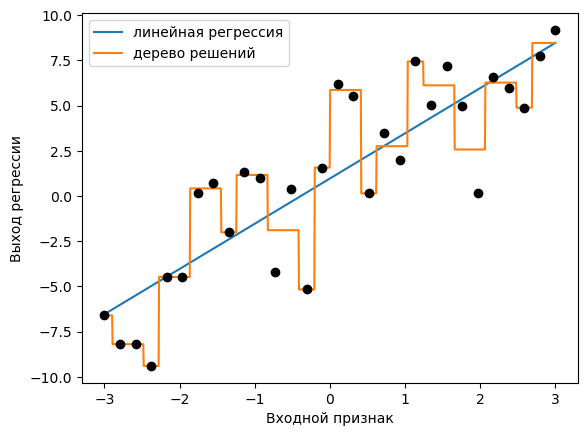

In [16]:
X,y = generate_linear_data(30)  # генерация данных с 1 признаком и 1 зависимой переменной

# генерация равномерно распределенных значений в заданном интервале
X_new = np.linspace(-3, 3, 1000) 

# применяем reshape(-1,1) для преобразования в двумерный массив, тк ожидается для обучения двумерный массив
X_new= X_new.reshape(-1,1) # (-1) - автоматическое определение числа строк, 1 - число колонок

tree = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
reg = LinearRegression().fit(X, y)

# предсказание для случайных значений line
plt.plot(X_new, reg.predict(X_new), label="линейная регрессия")
#plt.plot(X, reg.predict(X), label="линейная регрессия X")
plt.plot(X_new, tree.predict(X_new), label="дерево решений")
#plt.plot(X, tree.predict(X), label="дерево решений X")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Выход регрессии")
plt.xlabel("Входной признак")
plt.legend()

Представим, что диапазон значений входного признака (в данном 
случае от -3 до 3) разбит на определенное количество категорий или 
бинов (bins), допустим, на 10 категорий. Точка данных будет 
представлена категорией, в которую она попадает. Сначала мы должны 
задать категории. В данном случае мы зададим 10 категорий, равномерно 
распределенных между -3 и 3. Для этого мы используем функцию 
np.linspace, создаем 11 элементов, которые дадут 10 категорий –
интервалов, ограниченных двумя границами:


In [17]:
bins = np.linspace(-3, 3, 11)
print(bins) # категории

[-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


Далее мы записываем для каждой точки данных категорию, в которую 
она попадает. Это можно легко вычислить с помощью функции
**np.digitize**:

In [18]:
which_bin = np.digitize(X, bins=bins)

print("\nТочки данных:\n", X[:5])
print("\nКатегории для точек данных:\n", which_bin[:5])


Точки данных:
 [[-3.        ]
 [-2.79310345]
 [-2.5862069 ]
 [-2.37931034]
 [-2.17241379]]

Категории для точек данных:
 [[1]
 [1]
 [1]
 [2]
 [2]]


С помощью категориального признака мы задаем категорию для каждой 
точки данных. Чтобы запустить модель scikit-learn на этих данных, мы 
выполним прямое кодирование этого дискретного признака с помощью 
функции **OneHotEncoder** из модуля preprocessing. Функция 
OneHotEncoder выполняет ту же самую кодировку, что и
pandas.get_dummies, хотя в настоящее время она работает только с 
категориальными переменными, которые принимают целочисленные 
значения.

In [19]:
from sklearn.preprocessing import OneHotEncoder

# преобразовываем с помощью OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# encoder.fit находит уникальные значения, имеющиеся в which_bin
encoder.fit(which_bin)

# transform осуществляет прямое кодирование (теперь у нас 10 новых признаков, категорильных практически)
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Text(0.5, 0, 'Входной признак')

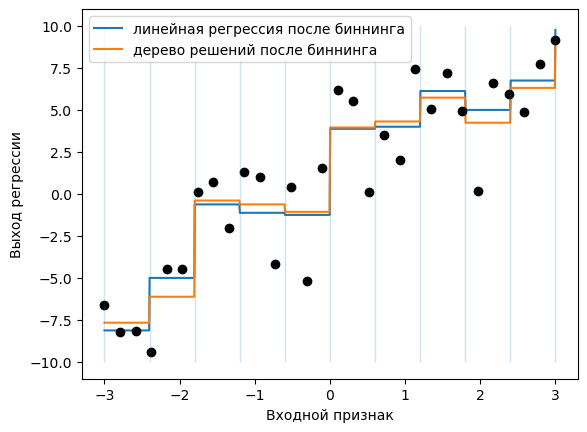

In [20]:
line_binned = encoder.transform(np.digitize(X_new, bins=bins))

reg = LinearRegression().fit(X_binned, y)
plt.plot(X_new, reg.predict(line_binned), label='линейная регрессия после биннинга')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(X_new, reg.predict(line_binned), label='дерево решений после биннинга')
plt.plot(X[:, 0], y, 'o', c='k')

plt.vlines(bins, -10, 10, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Выход регрессии")
plt.xlabel("Входной признак")

*Сравнив модели, обученные до и после биннинга 
переменных, мы видим, что линейная модель стала теперь гораздо более 
гибкой, потому что теперь оно присваивает различные значения
категориям, в то время как модель дерева решений стала существенно 
менее гибкой. В целом биннинг признаков не дает положительного
эффекта для моделей на основе дерева, поскольку эти модели сами могут 
научится разбивать данные по любому значению. В некотором смысле
это означает, что деревья решений могут самостоятельно осуществить 
биннинг для наилучшего прогнозирования данных. Кроме того, при 
выполнении разбиений деревья решений рассматривают несколько 
признаков сразу, в то время как обычный биннинг выполняется на 
основе анализа одного признака. Однако линейная модель после
преобразования данных выиграла с точки зрения эффективности*

Если есть веские причины использовать линейную модель для 
конкретного набора данных (например, он имеет большой объем и 
является многомерным), но некоторые признаки имеют нелинейные 
взаимосвязи с зависимой переменной – биннинг может быть отличным 
способом увеличить прогнозную силу модели.

## Взаимодействия и полиномы

Еще один способ обогатить пространство признаков, в частности, для 
линейных моделей, заключается в добавлении взаимодействий 
признаков (interaction features) и полиномиальных признаков
(polynomial features). Конструирование признаков подобного рода
получило распространение в статистическом моделировании, а также
широко используется во многих практических сферах применения
машинного обучения.

In [21]:
# вернем обратно признак к уже добавленным 10 категорильным чтобы задать наклон
X_combined = np.hstack([X,X_binned]) # горизонтально складывает массивы
pd.DataFrame(X_combined).head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-3.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-2.793103,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-2.586207,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-2.379310,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-2.172414,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(1000, 12)


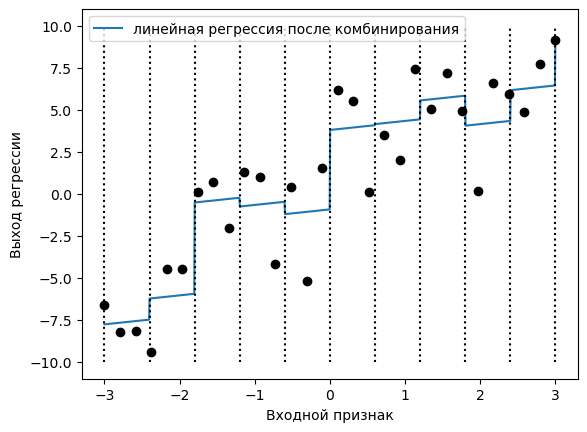

In [22]:
reg = LinearRegression().fit(X_combined, y)

X_new_combined = np.hstack([X_new, line_binned])
print(X_new_combined.shape)
plt.plot(X_new, reg.predict(X_new_combined), label='линейная регрессия после комбинирования')
 
for bin in bins:
    plt.plot([bin, bin], [-10, 10], ':', c='k')
plt.legend(loc="best")
plt.ylabel("Выход регрессии")
plt.xlabel("Входной признак")
plt.plot(X[:, 0], y, 'o', c='k')

Вычисленный наклон направлен вниз и он является 
общим для всех категорий, так как у нас имеется толька один признак по 
оси x с одним коэффициентом. Поскольку наличие одного наклона для 
всех категорий не очень сильно поможет с точки зрения моделирования,
мы бы хотели вычислить для каждой категории свой собственный 
наклон! Мы можем добиться этого, добавив взаимодействие или 
произведение признаков, указывающее категорию точки данных и ее 
расположение на оси х. Данный признак является произведением
индикатора категории и исходной переменной.

In [ ]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)
X_product[0]

In [ ]:
reg = LinearRegression().fit(X_product, y)
X_product = np.hstack([X_binned, X * X_binned])
plt.plot(X, reg.predict(X_product), label='линейная регрессия произведение')
 
for bin in bins:
    plt.plot([bin, bin], [-10, 10], ':', c='k')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Выход регрессии")
plt.xlabel("Входной признак")
plt.legend(loc="best")

*Использование биннинга – это способ увеличения пространства 
входных признаков.* 

Еще один способ заключается в использовании 
**полиномов** (polynomials) исходных признаков. 

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# задаем степень полинома 10:
# значение по умолчанию "include_bias=True" добавляет признак-константу 1
poly = PolynomialFeatures(degree=10, include_bias=False)

poly.fit(X) # подгонка полиномов

X_poly = poly.transform(X)  # добавление новых признаков в обучающий набор

pd.DataFrame(X_poly, columns=poly.get_feature_names()).head()

*Использование полиномиальных признаков в модели линейной 
регрессии дает классическую модель* **полиномиальной регрессии
(polynomial regression)**

Полиномиальная регрессия представляет собой вид линейной регрессии, в которой зависимость между зависимой переменной и независимой переменной моделируется полиномом высокой степени. В обычной линейной регрессии используется прямая линия, а в полиномиальной регрессии это может быть кривая n-го порядка.

Смысл полиномиальной регрессии заключается в том, чтобы более гибко моделировать сложные нелинейные зависимости между переменными. В отличие от обычной линейной регрессии, полиномиальная регрессия может более точно подстраиваться под форму данных.

Применение полиномиальной регрессии может быть полезным, например, когда требуется аппроксимировать криволинейные зависимости между переменными, такие как квадратичные или кубические зависимости. Однако стоит помнить, что использование полиномов более высоких степеней может привести к переобучению модели, особенно если данных недостаточно.

In [ ]:
reg = LinearRegression().fit(X_poly, y) # обучаем на новых признаках (полиномы)

line_poly = poly.transform(X_new) # тестовые данные 

plt.plot(X_new, reg.predict(line_poly), label='полиномиальная линейная регрессия')
plt.plot(X[:, 0], y, 'o', c='k');
plt.ylabel("Выход регрессии")
plt.xlabel("Входной признак")
plt.legend(loc="best");

Используя более сложную модель, модель ядерного SVM, мы можем
получить такой же сложный прогноз, как в случае полиномиальной 
регрессии, не прибегая к явному преобразованию признаков.

In [ ]:
from sklearn.svm import SVR
 
for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(X_new, svr.predict(X_new), label='SVR gamma={}'.format(gamma))
plt.plot(X_new, reg.predict(line_poly), label='полиномиальная линейная регрессия')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Выход регрессии")
plt.xlabel("Входной признак")
plt.legend(loc="best")


## Пример на реальных данных

In [ ]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston_info = load_boston();

In [ ]:
data = pd.DataFrame(boston_info.data, columns=boston_info.feature_names);
target = boston_info.target;

data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)

X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print(X_train.shape, 'тут только исходные признаки')
print(X_train_poly.shape, 'тут добавлены взаимодействия и степени')

In [ ]:
pd.DataFrame(X_train_poly, columns=poly.get_feature_names())

Набор данных первоначально содержал 13 признаков, которые в ходе 
преобразований превратились в 105 новых признаков. Эти новые 
признаки представляют собой все возможные взаимодействия между 
двумя различными исходными характеристиками, а также квадраты
исходных характеристик. В данном случае degree=2 означает, что мы 
рассматриваем признаки, которые являются произведением не более
двух исходных характеристик. Точное соответствие между входными и 
выходными признаками можно найти с помощью метода 
get_feature_names

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train_scaled, y_train)
print(f"R-квадрат на тестовом наборе без взаимодействий: {ridge.score(X_test_scaled, y_test):.2}")

ridge = Ridge().fit(X_train_poly, y_train)
print(f"R-квадрат на тестовом наборе с взаимодействиями: {ridge.score(X_test_poly, y_test):.2}")

Очевидно, что в случае с гребневой регрессией взаимодействия и 
полиномиальные признаки позволяют улучшить качество модели. 
Впрочем, применение более сложной модели типа случайного леса дает 
немного другой результат

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled, y_train)
print(f"R-квадрат на тестовом наборе с взаимодействиями: {rf.score(X_test_scaled, y_test):.2}")
rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train)
print(f"R-квадрат на тестовом наборе с взаимодействиями: {rf.score(X_test_poly, y_test):.2}")

*Видно, что даже без дополнительных признаков случайный лес дает 
более высокое качество модели, чем гребневая регрессия.* 
**Включение взаимодействий и полиномов на самом деле немного уменьшает качество 
модели**